# Create Trainings and Test Data

In [15]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import plotly.express as px

In [4]:
train_dir = Path('../data/interim/train/')

In [7]:
os.path.exists(train_dir), os.path.isdir(train_dir)

(True, True)

In [53]:
def xywh_to_MOTDataFrame(x, y, w, h):
    df = pd.DataFrame(
        {"Frame": np.arange(1, len(x) + 1),
         "Id": np.ones_like(x),
         "x": x.astype(int),
         "d": y.astype(int),
         "w": w.astype(int),
         "h": h.astype(int),
        }
    )
    return df

def MOTDataFrame_to_file(df, session_name):
    file_path = Path(train_dir, session_name + ".txt")
    df.to_csv(file_path, sep=" ", header=None) 



## Trainings Data for Method 1 (.txt-file only)

### Parabolic Balistic Trajectory

In [54]:
session_name = "ses_pbt_0"
fps = 25
frames_count = 100
dt = 1 / fps
T = frames_count / fps
t = np.arange(0, T, dt)

image_size = (640, 480) # width, height
bbx_size = (20, 20)

# initial position
x0 = bbx_size[0] / 2
y0 = image_size[1] - (bbx_size[1] / 2)

# final position
xT = image_size[0] - bbx_size[0] / 2
yT = y0

# vertex
xV = (xT - x0) / 2
yV = bbx_size[1] / 2

# initial velocities
vx = (xT - x0) / T

x = x0 + vx * t
y = 4 * (y0 - yV) / (T**2)*(t - T/2)**2 + yV

df = xywh_to_MOTDataFrame(x, y, np.ones_like(x) * bbx_size[0], np.ones_like(x) * bbx_size[1])
MOTDataFrame_to_file(df, session_name)

In [55]:
vx

155.0

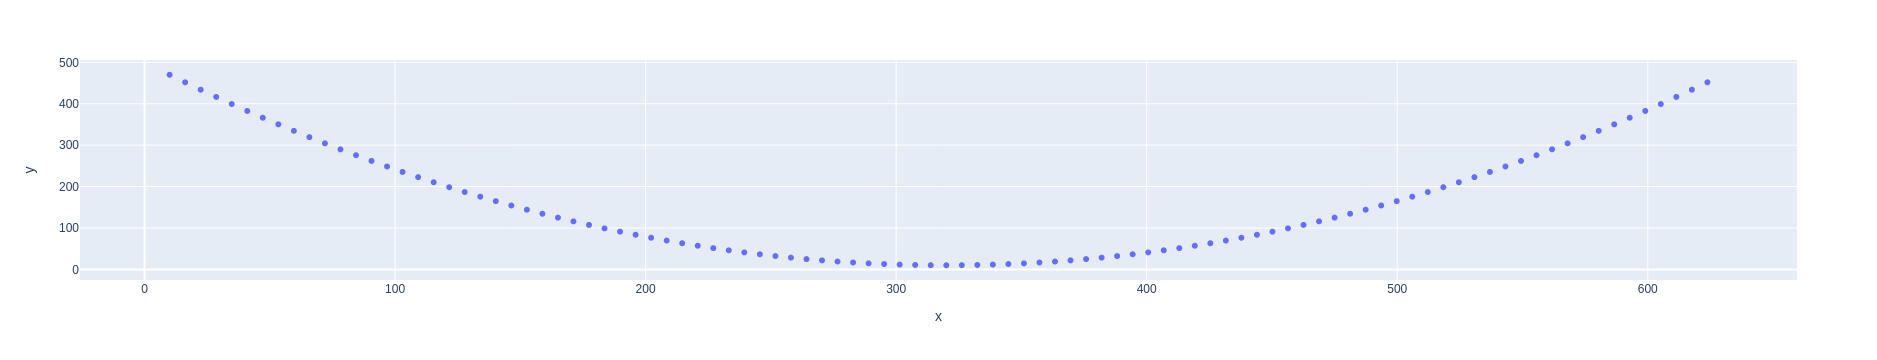

In [41]:
px.scatter(x=x, y=y)

In [36]:
df

,Frame,Id,x,d,w,h
0,0,1.0,10.0,470.000,20.0,20.0
1,1,1.0,16.2,451.784,20.0,20.0
2,2,1.0,22.4,433.936,20.0,20.0
3,3,1.0,28.6,416.456,20.0,20.0
4,4,1.0,34.8,399.344,20.0,20.0
...,...,...,...,...,...,...
95,95,1.0,599.0,382.600,20.0,20.0
96,96,1.0,605.2,399.344,20.0,20.0
97,97,1.0,611.4,416.456,20.0,20.0
98,98,1.0,617.6,433.936,20.0,20.0
